 # <span style="font-weight:bold">동적 계획법(Dynamic Programming)</style>
  - <span style="font-weight:bold">중복되는 부분 문제</span>가 발생할 때, 그것을 한 번만 계산하고 그 결과를 <span style="color:red;font-weight:bold">메모이제이션(Memoization)</span>하여 다른 비슷한 부분 문제들이 다시 발생할 때, 메모이제이션된 결과를 가져와 재활용
  - <span style="color:red;font-weight:bold">적절한 점화식</span>을 도출하는 것이 핵심

 #### <span style="font-weight:bold">사용 조건</style>
  - Overlapping Subproblems (겹치는 부분 문제) - 부분 문제가 중복되어 여러번 반복 계산되어야 한다.
  - Optimal Substructure (최적 부분 구조) - 전체 문제의 최적해가 부분 문제의 최적해로부터 구해질 수 있어야 한다.
 #### <span style="font-weight:bold">구현</style>
  - Top-Down (Memoization)
    1. 전체 문제를 작은 문제로 나누고, 그 부분 문제들을 해결하기 위해 <span style="color:red;font-weight:bold">재귀적</span>으로 동작
    2. 중복되는 부분 문제들을 해결하기 위해 <span style="color:red;font-weight:bold">메모이제이션</span>사용
  - Bottom-Up (Tabulation)
    1. 재귀적인 호출 없이, <span style="color:red;font-weight:bold">작은 부분 문제들을 먼저 해결</span>하고, 그 결과를 이용해 전체 문제를 해결
    2. <span style="color:red;font-weight:bold">이전에 계산한 결과를 저장</span>하고, 그 결과를 이용해 다음 계산 수행

 # <span style="font-weight:bold">Fibonacci Series - Recursive</span>

In [ ]:
import time
start_time = time.time()

def fib_recursive(n):
    if n < 2:
        return n
    else:
        return fib_recursive(n - 1) + fib_recursive(n - 2)
    
n = 36    
print(fib_recursive(n)) # 14930352
print(time.time() - start_time) # 2.007757

 # <span style="font-weight:bold">Fibonacci Series - Top-Down</span>

In [ ]:
import time
start_time = time.time()

def fib_top_down(n):
    if n < 2:
        return n
    
    if memo[n] is None:
        memo[n] = fib_top_down(n - 1) + fib_top_down(n - 2)
        # 위에서부터 바로 호출
        # 재귀적으로 동작하며 하위 문제의 값을 Memoization
    return memo[n]

n = 36
memo = [None] * (n + 1)
print(fib_top_down(n)) # 14930352
print(time.time() - start_time) # 0.0

 # <span style="font-weight:bold">Fibonacci Series - Bottom-Up</span>

In [ ]:
import time
start_time = time.time()

def fib_bottom_up(n):
    memo = [0, 1]

    for i in range(2, n + 1):
        memo.append(memo[i - 1] + memo[i - 2])
        # 하위 문제부터 해결
        # 반목문을 통해 동작하며 하위 문제의 값을 Tabulation
    return memo[-1]

n = 36
print(fib_bottom_up(n)) # 14930352
print(time.time() - start_time) # 0.0

1463번 1로 만들기 <span style="color:red">실패</span> - 2025.02.20
 - <span style="color:green">25.03.10 05:55</span>

In [ ]:
x = int(input()) # Bottom-Up

memo = [0] * (x + 1)
for i in range(2, x + 1):
    memo[i] = memo[i - 1] + 1
    if i % 2 == 0:
        memo[i] = min(memo[i], memo[i//2] + 1)
    if i % 3 == 0:
        memo[i] = min(memo[i], memo[i//3] + 1)

print(memo[x])

# Top-Down
# def make_one(n): 
#     print(memo)
#     if n in memo.keys():
#         return memo[n]
#     if n % 3 == 0 and n % 2 == 0:
#         memo[n] = min(make_one(n//3) + 1, make_one(n//2) + 1)
#     elif n % 3 == 0:
#         memo[n] = min(make_one(n//3) + 1, make_one(n - 1) + 1)
#     elif n % 2 == 0:
#         memo[n] = min(make_one(n//2) + 1, make_one(n - 1) + 1)
#     else:
#         memo[n] = make_one(n - 1) + 1
#     return memo[n]

# x = int(input())

# memo = {1:0}
# print(make_one(x))

11726번 2Xn 타일링 <span style="color:green">성공</span> - 2025.02.21
 - 백준에선 RecursionError 발생 (sys.setrecursion() 사용하기) - Top-Down일 때
 - <span style="color:green">25.03.04 복습</span>
 - <span style="color:green">25.03.10 04:37</span>

In [ ]:
def Tiling(n): # Bottom-Up
    memo = [1, 1]

    for i in range(2, n + 1):
        memo.append(memo[i - 1] + memo[i - 2])
    return memo[-1]

n = int(input())
print(Tiling(n) % 10007)

# Top-Down
# import sys 
# sys.setrecursionlimit(10**6)

# def Tiling(n):
#     if n < 2:
#         return 1
    
#     if memo[n] is None:
#         memo[n] = Tiling(n - 1) + Tiling(n - 2)
    
#     return memo[n]

# n = int(input())
# memo = [None] * (n + 1)
# print(Tiling(n) % 10007)


11727번 2Xn 타일링 2 <span style="color:green">성공</span> - 2025.02.21
 - <span style="color:green">25.03.04 복습</span>
 - <span style="color:green">25.03.10 04:02</span>

In [ ]:
def Tiling(n): # Bottom-Up
    memo = [1, 1]

    for i in range(2, n + 1):
        memo.append(memo[i - 1] + memo[i - 2] * 2)

    return memo[-1]

n = int(input())
print(Tiling(n) % 10007)

# Top-Down
# import sys 
# sys.setrecursionlimit(10**6)

# def Tiling(n):
#     if n < 2:
#         return 1

#     if memo[n] is None:
#         memo[n] = Tiling(n - 1) + Tiling(n - 2) * 2
#     return memo[n]

# n = int(input())
# memo = [None] * (n + 1)
# print(Tiling(n) % 10007)


9095번 1, 2, 3 더하기 <span style="color:green">성공</span> - 2025.02.21
 - <span style="color:green">25.03.04 복습</span>
 - <span style="color:green">25.03.10 02:12</span>

In [ ]:
def one_two_three(n): # Bottom-Up
    memo = [1, 1, 2]

    for i in range(3, n + 1):
        memo.append(memo[i - 1] + memo[i - 2] + memo[i - 3])

    return memo[n]

t = int(input())
for _ in range(t):
    print(one_two_three(int(input())))

# Top-Down
# import sys
# sys.setrecursionlimit(10**6)
# def one_two_three(n):
#     if n < 2:
#         return 1
#     elif n == 2:
#         return 2
    
#     if memo[n] is None:
#         memo[n] = one_two_three(n - 1) + one_two_three(n - 2) + one_two_three(n - 3)
#     return memo[n]

# t = int(input())
# for _ in range(t):
#     n = int(input())
#     memo = [None] * (n + 1)
#     print(one_two_three(n))

11052번 카드 구매하기 <span style="color:red">실패</span> - 2025.02.24
 - 점화식 유도 실패
 - 점화식을 세울 때 다른 부가적인 리스트 사용도 고려해볼 것
 - <span style="color:green">25.03.06 복습</span>
 - <span style="color:green">25.03.10 13:46</span>

In [ ]:
n = int(input()) # Bottom-Up
p = [0] + list(map(int, input().split()))
dp = [0] * (n + 1)

for i in range(1, n + 1):
    for j in range(1, i + 1):
        dp[i] = max(dp[i], dp[i - j] + p[j])

print(dp[n])

16194번 카드 구매하기2 <span style="color:green">성공</span> - 2025.02.25
 - <span style="color:green">25.03.06 복습</span>
 - <span style="color:green">25.03.11 02:39</span>

In [ ]:
n = int(input())
p = [0] + list(map(int, input().split()))

dp = [0] * (n + 1)
for i in range(1, n + 1):
    dp[i] = p[i]
    for j in range(1, i):
        dp[i] = min(dp[i], dp[i - j] + p[j])

print(dp[n])

15990번 1, 2, 3 더하기 5 <span style="color:red">실패 - 시간초과</span> - 2025.02.25
 - 함수를 계속 돌려서 시간초과 한번에 최댓값으로 리스트 생성 후 출력하기
 - 점화식은 잘 유도 했음
 - <span style="color:green">25.03.06 복습</span>
 - <span style="color:green">25.03.11 16:55</span>

In [ ]:
def one_two_three():
    dp = [[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 1]]

    for i in range(4, 100001):
        temp = []
        temp.append(dp[i - 1][1] + dp[i - 1][2] % 1000000009)
        temp.append(dp[i - 2][0] + dp[i - 2][2] % 1000000009)
        temp.append(dp[i - 3][0] + dp[i - 3][1] % 1000000009)
        dp.append(temp)

    return dp

dp_list = one_two_three()

t = int(input())
for i in range(t):
    print(sum(dp_list[int(input())]) % 1000000009)

10844번 쉬운 계단 수 <span style="color:red">실패</span> - 2025.02.26
 - 점화식 세울 때 억지로 세우지 말고 문제의 패턴을 볼 것
 - <span style="color:green">25.03.07 복습</span>

In [ ]:
n = int(input())

dp = [[0 for _ in range(10)] for _ in range(n + 1)]

dp[1] = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

for i in range(2, n + 1): # i는 자리수, j는 끝 숫자
    dp[i][0] = dp[i - 1][1]
    dp[i][9] = dp[i - 1][8]

    for j in range(1, 9):
        dp[i][j] = dp[i - 1][j - 1] + dp[i - 1][j + 1]

print(sum(dp[n]) % 1000000000)

2193번 이친수 <span style="color:green">성공</span> - 2025.02.26
 - <span style="color:green">25.03.07 복습</span>
 - <span style="color:green">25.03.11 05:48</span>

In [ ]:
n = int(input())
dp = [0, 1]

for i in range(2, n + 1):
    dp.append(dp[i - 1] + dp[i - 2])

print(dp[n])

11053번 가장 긴 증가하는 부분 수열 <span style="color:red">실패</span> - 2025.02.27
 - LIS(Longest increasing Subsequence) 라고 불리는 유형
 - 푸는 방법으로는 완전탐색, 다이나믹 프로그래밍, 이진탐색(Best)가 있다.
 - 문제 접근 실패
 - <span style="color:green">25.03.11 03:30</span>

 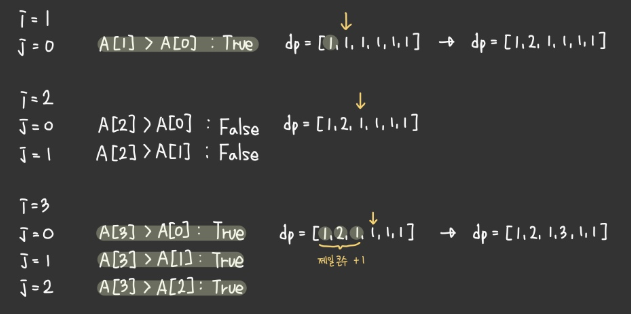

In [ ]:
n = int(input())
a = list(map(int, input().split()))

dp = [1] * n

for i in range(1, n):
    for j in range(i):
        if a[j] < a[i]:
            dp[i] = max(dp[i], dp[j] + 1)

print(max(dp))

14002번 가장 긴 증가하는 부분 수열 4 <span style="color:red">실패</span> - 2025.02.27
 - 풀이법은 생각났지만 구현 실패

In [ ]:
n = int(input())
a = list(map(int, input().split()))

dp = [1] * n
num_dp = [[a[i]] for i in range(n)]

for i in range(1, n):
    for j in range(i):
        if a[i] > a[j] and dp[i] < dp[j] + 1:
            dp[i] = dp[j] + 1
            num_dp[i] = num_dp[j] + [a[i]]

print(max(dp))
print(*num_dp[dp.index(max(dp))])


1912번 연속합 <span style="color:red">실패</span> - 2025.02.28
 - 조금만 더 고민했으면 풀었을 것 같은 문제
 - <span style="color:green">25.03.08 복습</span>
 - <span style="color:green">25.03.12 03:20</span>

In [ ]:
n = int(input())
a = list(map(int, input().split()))

dp = [0] * n
dp[0] = a[0]

for i in range(1, n):
    dp[i] = max(a[i], a[i] + dp[i - 1])

print(max(dp))

1699번 제곱수의 합 <span style="color:red">실패</span> - 2025.03.01

In [ ]:
n = int(input())
dp = [i for i in range(n + 1)]

for i in range(1, n + 1):
    for j in range(1, i):
        if j * j > i:
            break
        if dp[i] > dp[i - j * j] + 1:
            dp[i] = dp[i - j * j] + 1

print(dp[n])

2225번 합분해 <span style="color:red">실패</span> - 2025.03.02
 - <span style="color:green">25.03.09 복습</span>
 - <span style="color:green">25.03.12 07:55</span>

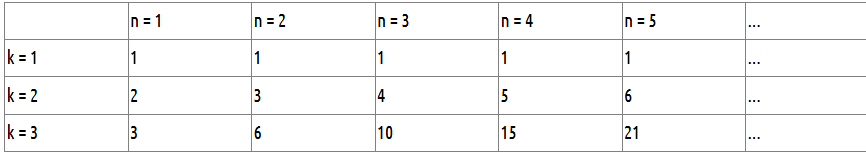

In [ ]:
n, k = map(int, input().split())

dp = [[i] + [1] * (n - 1) for i in range(1, k + 1)]

for i in range(1, k):
    for j in range(1, n):
        dp[i][j] = dp[i - 1][j] + dp[i][j - 1]

print(dp[-1][-1] % 1000000000)